In [40]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


url = 'http://www.aikustore.com:8080/mjsys/wemall/WemallGoodsAction!list'
r = requests.get(url)
parsed = r.json()
# print(parsed)
text = json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False)
# print(text)


df = pd.DataFrame.from_dict(parsed['rows'])
print(df['goods_name'].head())


0    I’m David16专柜新品爱大卫韩版春季男装长袖休闲外套DQJP11C1
1                       秋冬新款男装 冲锋衣羽绒服 中长厚外套
2           春季长袖T恤男士宽松加大码上衣青年男装t恤韩版假两件衬衫领体恤
3     马克华菲长袖衬衫 2015秋装新款男士修身韩版拼接衬衣7153307221
4                    法兰绒休闲格子衬衫男长袖免烫磨毛男士格子衬衣
Name: goods_name, dtype: object


       goods_name  goods_salenum
189   【包邮】时尚牛仔直筒裤           1636
188   【包邮】破洞九分小脚裤           1599
187   【包邮】九分破洞牛仔裤           1595
185  【包邮】高腰开叉喇叭长裤           1577
191   【包邮】破洞渔网牛仔裤           1562


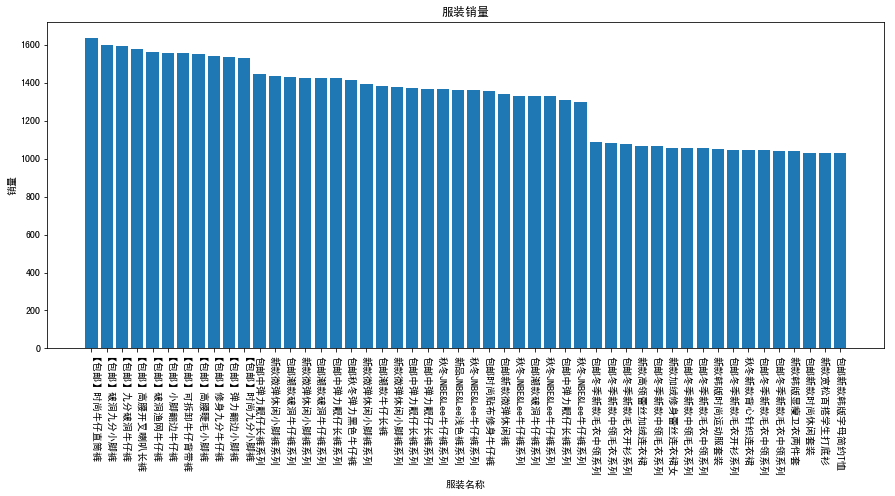

In [42]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
fig_1 = plt.figure(figsize=(15, 6))
plt.title('服装销量')
data = df[['goods_name', 'goods_salenum']]
data = data.sort_values(by = ['goods_salenum'], ascending=False)
print(data.head())
x = data['goods_name'][:50]
y = data['goods_salenum'][:50]

plt.bar(range(50), y, tick_label=x)
plt.xticks(rotation=270)
plt.xlabel('服装名称')
plt.ylabel('销量')
# plt.grid(True)
plt.show()

   goods_current_price  goods_salenum
0               769.00             55
1               789.00             88
2                65.00             25
3               148.52             12
4               238.00             54
5                88.00             63
6               159.00             67
7               512.00             55
8               378.00             62
9               208.00             59


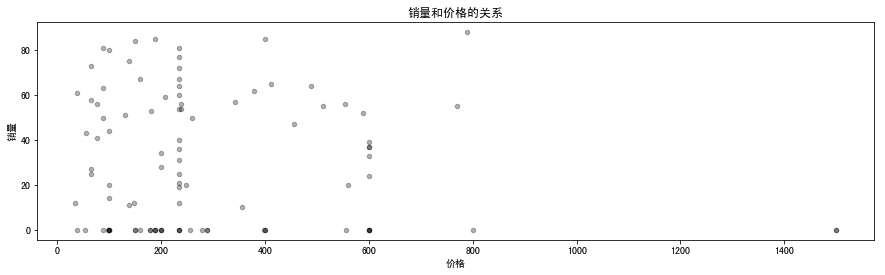

In [60]:
data_sale = df[['goods_current_price','goods_salenum']]
# print(data_sale.head(20))

# data_sale.index = data_sale['goods_salenum']
# data_sale = data_sale.drop(['goods_salenum'], axis = 1)
# print(data_sale.head(20))

data_sale_fin = data_sale.head(100)
print(data_sale_fin.head(10))
fig_2 = plt.figure(figsize=(15,4))
# plt.plot(data_sale.head(20), color='r', marker='o', alpha=0.8)
plt.scatter(data_sale_fin['goods_current_price'], data_sale_fin['goods_salenum'], color='black', alpha=0.3, s=20)
plt.title('销量和价格的关系')
plt.xlabel('价格')
plt.ylabel('销量')
plt.show()